# Assignment 1

## Dataset preprocessing and merging

We have started by creating our dataset with the following focus crimes spanning the years 2003-2025: ARSON, DRUG OFFENSE, EMBEZZLEMENT, GAMBLING, LIQUOR LAWS, MOTOR VEHICLE THEFT, ROBBERY, STOLEN PROPERTY, SUICIDE, WARRANT.

The dataset was created in the following phases:

Phase 1: Data loading and standardization
* Loaded two crime datasets: new_reports.csv (2018-2026) and old_reports.csv (2003-2018)
* Standardized column names between both datasets (e.g., Category → Incident Category, PdDistrict → Police District)
* Converted data types and extracts missing information (e.g. year from dates)
* Cleaned data by removing NaN values and filtering out incomplete years (2026)
* Converted all text to uppercase for consistency

Phase 2: Category analysis & mapping
* Identified unique crime categories in both datasets
* Performed category matching analysis between new and old datasets
* Made decisions on which categories to standardize (e.g. DRUG/NARCOTIC → DRUG OFFENSE, WARRANTS → WARRANT)
* Documented 15 core crime categories with high confidence matches, excluding vague/administrative categories - We used Copilot here to do an initial analysis.

Phase 3: Dataset merging
* Checked for data overlap (removed the 2018 data from one of the datasets)
* Concatenated the two datasets into a single merged dataset

Phase 3: Visualisation
* Created yearly trend plots for the 15 crime categories (2003-2025)
* Generated category plots

Phase 4: Final filtering
* Based on the plots we removed the categories that showed a big jump / any unusual trend in the transition period between 2017 and 2019, keeping only 10 categories in the final dataset: ARSON, DRUG OFFENSE, EMBEZZLEMENT, GAMBLING, LIQUOR LAWS, MOTOR VEHICLE THEFT, ROBBERY, STOLEN PROPERTY, SUICIDE, WARRANT.

### Category analysis by Copilot

As mentioned above, in phase 2 we used Copilot to make an initial analysis of the category merging. The following is the analysis provided:

#### Category Matching Analysis: New DF vs Old DF

##### Direct Matches (Same or Very Similar Names)
- ARSON → ARSON ✓
- ASSAULT → ASSAULT ✓
- BURGLARY → BURGLARY ✓
- DISORDERLY CONDUCT → DISORDERLY CONDUCT ✓
- EMBEZZLEMENT → EMBEZZLEMENT ✓
- FRAUD → FRAUD ✓
- GAMBLING → GAMBLING ✓
- LIQUOR LAWS → LIQUOR LAWS ✓
- MISSING PERSON → MISSING PERSON ✓
- MOTOR VEHICLE THEFT → MOTOR VEHICLE THEFT ✓
- NON-CRIMINAL → NON-CRIMINAL ✓
- OTHER OFFENSES → OTHER OFFENSES ✓
- PROSTITUTION → PROSTITUTION ✓
- RECOVERED VEHICLE → RECOVERED VEHICLE ✓
- ROBBERY → ROBBERY ✓
- STOLEN PROPERTY → STOLEN PROPERTY ✓
- SUICIDE → SUICIDE ✓
- SUSPICIOUS OCC → SUSPICIOUS OCC ✓
- VANDALISM → VANDALISM ✓

##### Close Matches (Minor Naming Variations)
- FORGERY AND COUNTERFEITING → FORGERY/COUNTERFEITING ✓
- LARCENY THEFT → LARCENY/THEFT ✓
- WEAPONS OFFENCE / WEAPONS OFFENSE → WEAPON LAWS (likely match, though naming is different)

##### Complex Matches (Multiple New Categories Map to One Old Category)
- DRUG OFFENSE + DRUG VIOLATION → DRUG/NARCOTIC (possible consolidation in new data)
- HUMAN TRAFFICKING (A), COMMERCIAL SEX ACTS + HUMAN TRAFFICKING (B), INVOLUNTARY SERVITUDE → (no direct old equivalent - new categorization)
- SEX OFFENSE → Could be: SEX OFFENSES, FORCIBLE or SEX OFFENSES, NON FORCIBLE (split in old data)

##### Ambiguous Cases (Require Human Judgment)
1. **HUMAN TRAFFICKING categories** - New data has detailed human trafficking categories; old data doesn't. These might be:
   - New categorizations not in old data
   - Or previously coded under different categories (prostitution, assault, etc.)

2. **CASE CLOSURE, CIVIL SIDEWALKS, COURTESY REPORT, FIRE REPORT, MISCELLANEOUS INVESTIGATION, NON-CRIMINAL, VEHICLE IMPOUNDED, VEHICLE MISPLACED, WARRANT vs WARRANTS** - These administrative/miscellaneous categories don't have clear matches in old data

3. **OLD ONLY categories with no clear NEW match:**
   - BAD CHECKS
   - BRIBERY
   - DRIVING UNDER THE INFLUENCE
   - DRUNKENNESS
   - EXTORTION
   - KIDNAPPING
   - LOITERING
   - PORNOGRAPHY/OBSCENE MAT
   - SECONDARY CODES (likely administrative)
   - TRESPASS (was mentioned but might be merged elsewhere)

## Part 5

### *Select at least 4 of your Personal Focus Crimes for this exercise. More is fine - if you want to be closer to the actual weekly exercise.*

Based on all our results we decided on choosing: DRUG OFFENSE, LIQUOR LAWS, MOTOR VEHICLE THEFT, ROBBERY, STOLEN PROPERTY, WARRANT.

In [312]:
import io
import urllib
import zipfile
import pandas as pd

In [313]:
url = "https://raw.githubusercontent.com/denisababeii/assignment1_social_data/main/data/selected.csv.zip"

# Download the zipped file
with urllib.request.urlopen(url) as response:
    data = response.read()

# Extract and read the CSV from the zip file
with zipfile.ZipFile(io.BytesIO(data)) as zip_file:
    # List files in the zip to see what's inside
    print("Files in zip:", zip_file.namelist())
    
    # Read the CSV file (adjust filename if needed)
    csv_filename = zip_file.namelist()[0]  # Gets the first file in the zip
    with zip_file.open(csv_filename) as csv_file:
        df = pd.read_csv(csv_file)

# Save it locally
df.to_csv('selected.csv', index=False)
print("✓ File saved as 'selected.csv'")
print(f"Shape: {df.shape}")
df.head()

Files in zip: ['selected.csv', '__MACOSX/._selected.csv']
✓ File saved as 'selected.csv'
Shape: (480796, 7)


,Incident Date,Incident Time,Incident Year,Incident Category,Police District,Latitude,Longitude
0,2016-03-03,19:30,2016,MOTOR VEHICLE THEFT,TARAVAL,37.707968,-122.463545
1,2014-12-26,15:30,2014,MOTOR VEHICLE THEFT,MISSION,37.755900,-122.424435
2,2012-05-04,12:00,2012,ROBBERY,INGLESIDE,37.708311,-122.420084
3,2013-11-02,10:06,2013,ARSON,PARK,37.751998,-122.459032
4,2016-01-29,10:09,2016,WARRANT,SOUTHERN,37.776930,-122.410809


In [314]:
categories_to_keep = [
    'DRUG OFFENSE', 'LIQUOR LAWS', 'MOTOR VEHICLE THEFT', 'ROBBERY', 'STOLEN PROPERTY', 'WARRANT'
]

df = df[df['Incident Category'].isin(categories_to_keep)]

### *For each selected crime type, compute the total number of incidents for each of the 168 hours of the week (i.e., Monday 00:00–01:00, Monday 01:00–02:00, ..., Sunday 23:00–00:00). Each crime type will give you a vector of 168 values.*

In [ ]:
# Create a copy of df to not modify the original
df_weekly = df.copy()

# Convert Incident Date to datetime
df_weekly['Incident Date'] = pd.to_datetime(df_weekly['Incident Date'])

# Convert Incident Time to datetime
df_weekly['Incident Time'] = pd.to_datetime(df_weekly['Incident Time'])

# Extract day of week (0=Monday, 6=Sunday)
df_weekly['DayOfWeek'] = df_weekly['Incident Date'].dt.dayofweek

# Extract hour (0-23)
df_weekly['Hour'] = df_weekly['Incident Time'].dt.hour

# Create hour_of_week identifier (0-167)
# Hour 0 = Monday 00:00-01:00
# Hour 24 = Tuesday 00:00-01:00
# Hour 168 would be Monday again
df_weekly['HourOfWeek'] = df_weekly['DayOfWeek'] * 24 + df_weekly['Hour']

# Group by category and hour_of_week, count incidents
weekly_patterns = df_weekly.groupby(['Incident Category', 'HourOfWeek']).size().reset_index(name='count')

# Create a pivot table with hours as rows and categories as columns
weekly_vectors = weekly_patterns.pivot(index='HourOfWeek', columns='Incident Category', values='count').fillna(0)

# Ensure all 168 hours are present (even if some have 0 incidents)
all_hours = pd.DataFrame({'HourOfWeek': range(168)})
weekly_vectors = all_hours.merge(weekly_vectors, left_on='HourOfWeek', right_index=True, how='left').fillna(0)
weekly_vectors = weekly_vectors.set_index('HourOfWeek')

# Convert to integers
weekly_vectors = weekly_vectors.astype(int)

### *Scatterplot matrix: Create a grid of pairwise scatterplots — one panel per pair of crime types, with one crime on each axis and each of the 168 hours as a point. Label each panel clearly with the two crime types being compared.*

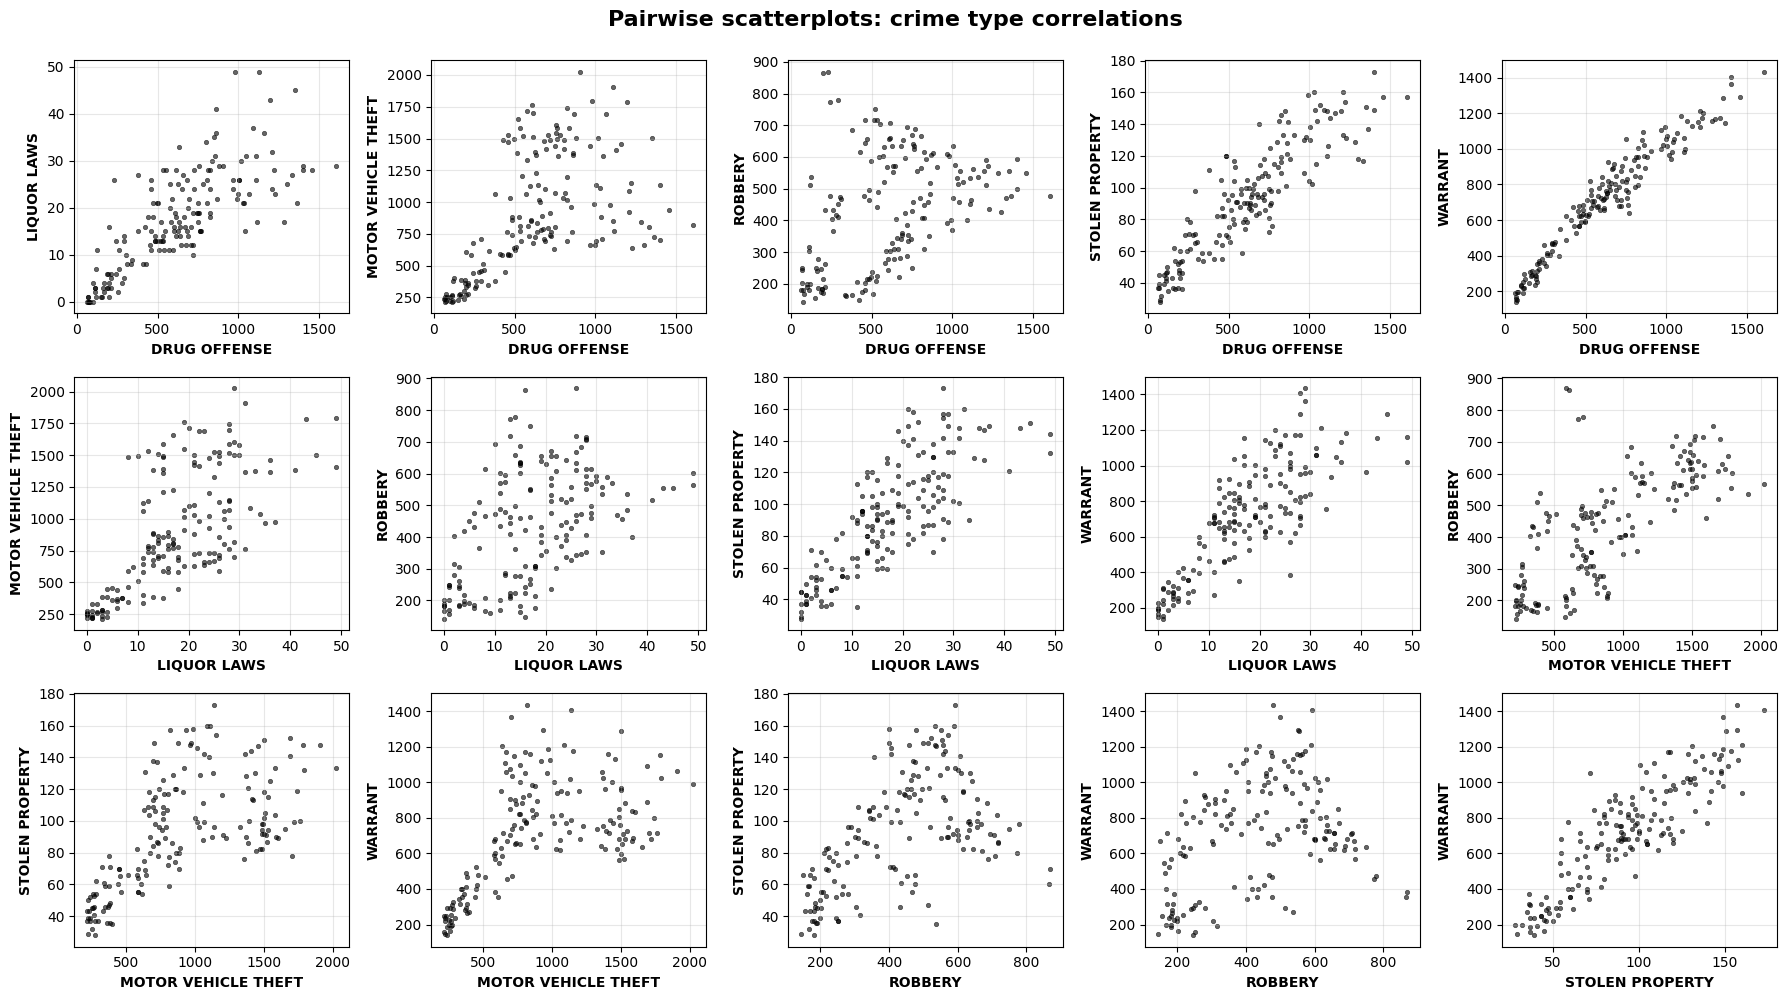

In [318]:
import matplotlib.pyplot as plt
import numpy as np
from itertools import combinations

# Get all pairwise combinations of crime categories
crime_types = weekly_vectors.columns.tolist()
pairs = list(combinations(crime_types, 2))

# Create a grid of subplots
# For 15 pairs (6 crimes), we'll use 3 rows × 5 columns
n_pairs = len(pairs)
n_cols = 5
n_rows = int(np.ceil(n_pairs / n_cols))

fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, 10))
axes = axes.flatten()

# Create a scatterplot for each pair
for idx, (crime1, crime2) in enumerate(pairs):
    ax = axes[idx]
    
    # Get the data for these two crime types
    x = weekly_vectors[crime1].values
    y = weekly_vectors[crime2].values
    hours = weekly_vectors.index.values
    
    # Create scatterplot
    ax.scatter(x, y, s=10, alpha=0.6, edgecolors='black', linewidth=0.5, color='black')
    
    # Add labels and title
    ax.set_xlabel(crime1, fontsize=10, fontweight='bold')
    ax.set_ylabel(crime2, fontsize=10, fontweight='bold')
    
    # Add grid
    ax.grid(True, alpha=0.3)

# Remove extra subplots
for idx in range(n_pairs, len(axes)):
    axes[idx].remove()

plt.suptitle('Pairwise scatterplots: crime type correlations', 
             fontsize=16, fontweight='bold', y=0.995)
plt.tight_layout()
plt.show()

### *Linear regression: Using the closed-form equations from Week 4 (not a library), fit a regression line to each pair and add it to the relevant panel*

In [319]:
# Compute regression line based on the closed-form equations
def compute_regression_line(x, y):
    """
    Closed-form solution:
        a (slope)     = Σ(xi - x̄)(yi - ȳ) / Σ(xi - x̄)²
        b (intercept) = ȳ - a·x̄
    """
    x_bar = x.mean()
    y_bar = y.mean()
    dx    = x - x_bar
    a     = (dx * (y - y_bar)).sum() / (dx ** 2).sum() if (dx ** 2).sum() != 0 else 0.0
    b     = y_bar - a * x_bar
    return a, b

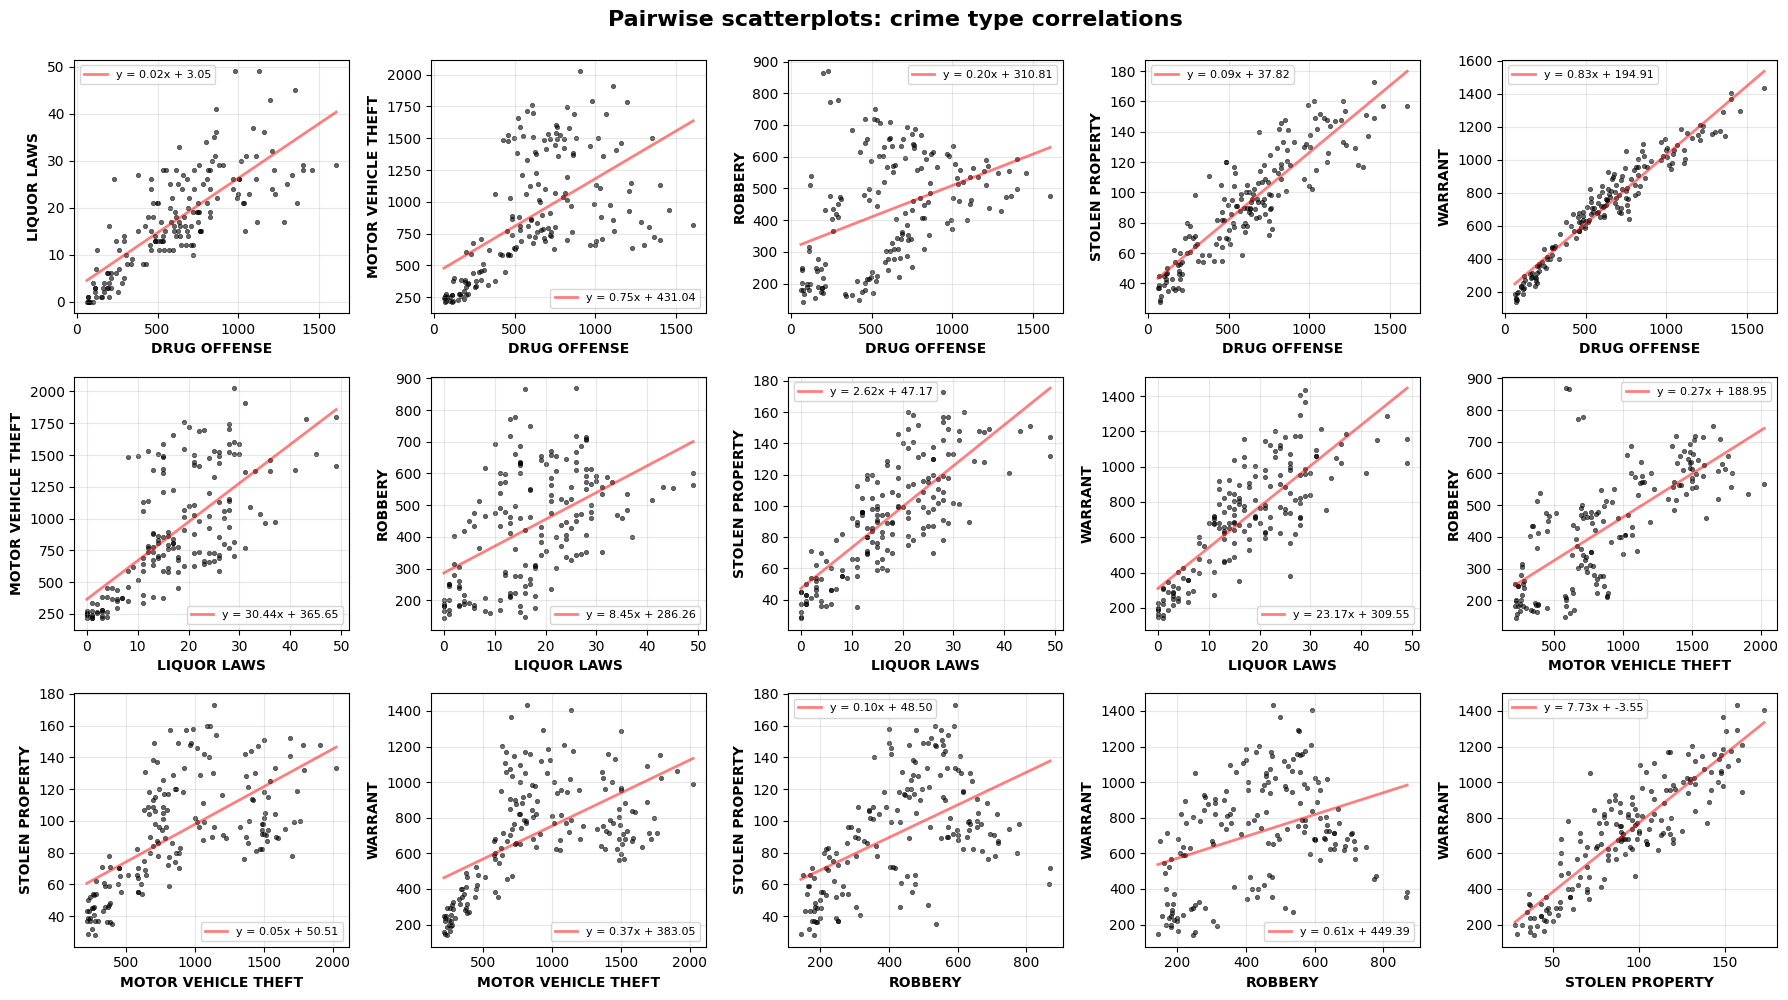

In [332]:
import matplotlib.pyplot as plt
import numpy as np
from itertools import combinations

# Get all pairwise combinations of crime categories
crime_types = weekly_vectors.columns.tolist()
pairs = list(combinations(crime_types, 2))

# Create a grid of subplots
# For 15 pairs (6 crimes), we'll use 3 rows × 5 columns
n_pairs = len(pairs)
n_cols = 5
n_rows = int(np.ceil(n_pairs / n_cols))

fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, 10))
axes = axes.flatten()

# Create a scatterplot for each pair
for idx, (crime1, crime2) in enumerate(pairs):
    ax = axes[idx]
    
    # Get the data for these two crime types
    x = weekly_vectors[crime1].values
    y = weekly_vectors[crime2].values
    hours = weekly_vectors.index.values
    
    # Create scatterplot
    ax.scatter(x, y, s=10, alpha=0.6, edgecolors='black', linewidth=0.5, color='black')
    
    # Compute and plot regression line
    a, b = compute_regression_line(x, y)
    x_min, x_max = x.min(), x.max()
    x_line = np.array([x_min, x_max])
    y_line = a * x_line + b
    ax.plot(x_line, y_line, color='red', linewidth=2, label=f'y = {a:.2f}x + {b:.2f}', alpha=0.5)
    
    # Add labels and title
    ax.set_xlabel(crime1, fontsize=10, fontweight='bold')
    ax.set_ylabel(crime2, fontsize=10, fontweight='bold')
    
    # Add grid
    ax.grid(True, alpha=0.3)
    ax.legend(fontsize=8, loc='best')

# Remove extra subplots
for idx in range(n_pairs, len(axes)):
    axes[idx].remove()

plt.suptitle('Pairwise scatterplots: crime type correlations', 
             fontsize=16, fontweight='bold', y=0.995)
plt.tight_layout()
plt.show()

### *Compute R squared for each pair and display the value on each panel.*

In [333]:
# Computes R squared
def compute_r_squared(x, y):
    """
    R² = 1 - SS_res / SS_tot
    SS_res = Σ(y_i - ŷ_i)²
    SS_tot = Σ(y_i - ȳ)²
    """
    a, b = compute_regression_line(x, y)
    y_pred = a * x + b
    ss_res = np.sum((y - y_pred) ** 2)
    ss_tot = np.sum((y - y.mean()) ** 2)
    return 1.0 - ss_res / ss_tot if ss_tot != 0 else 0.0

/var/folders/52/cnr2_8nx2mncwgy2ygk46jpw0000gp/T/ipykernel_36969/2682732578.py:48: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend(fontsize=8, loc='best')


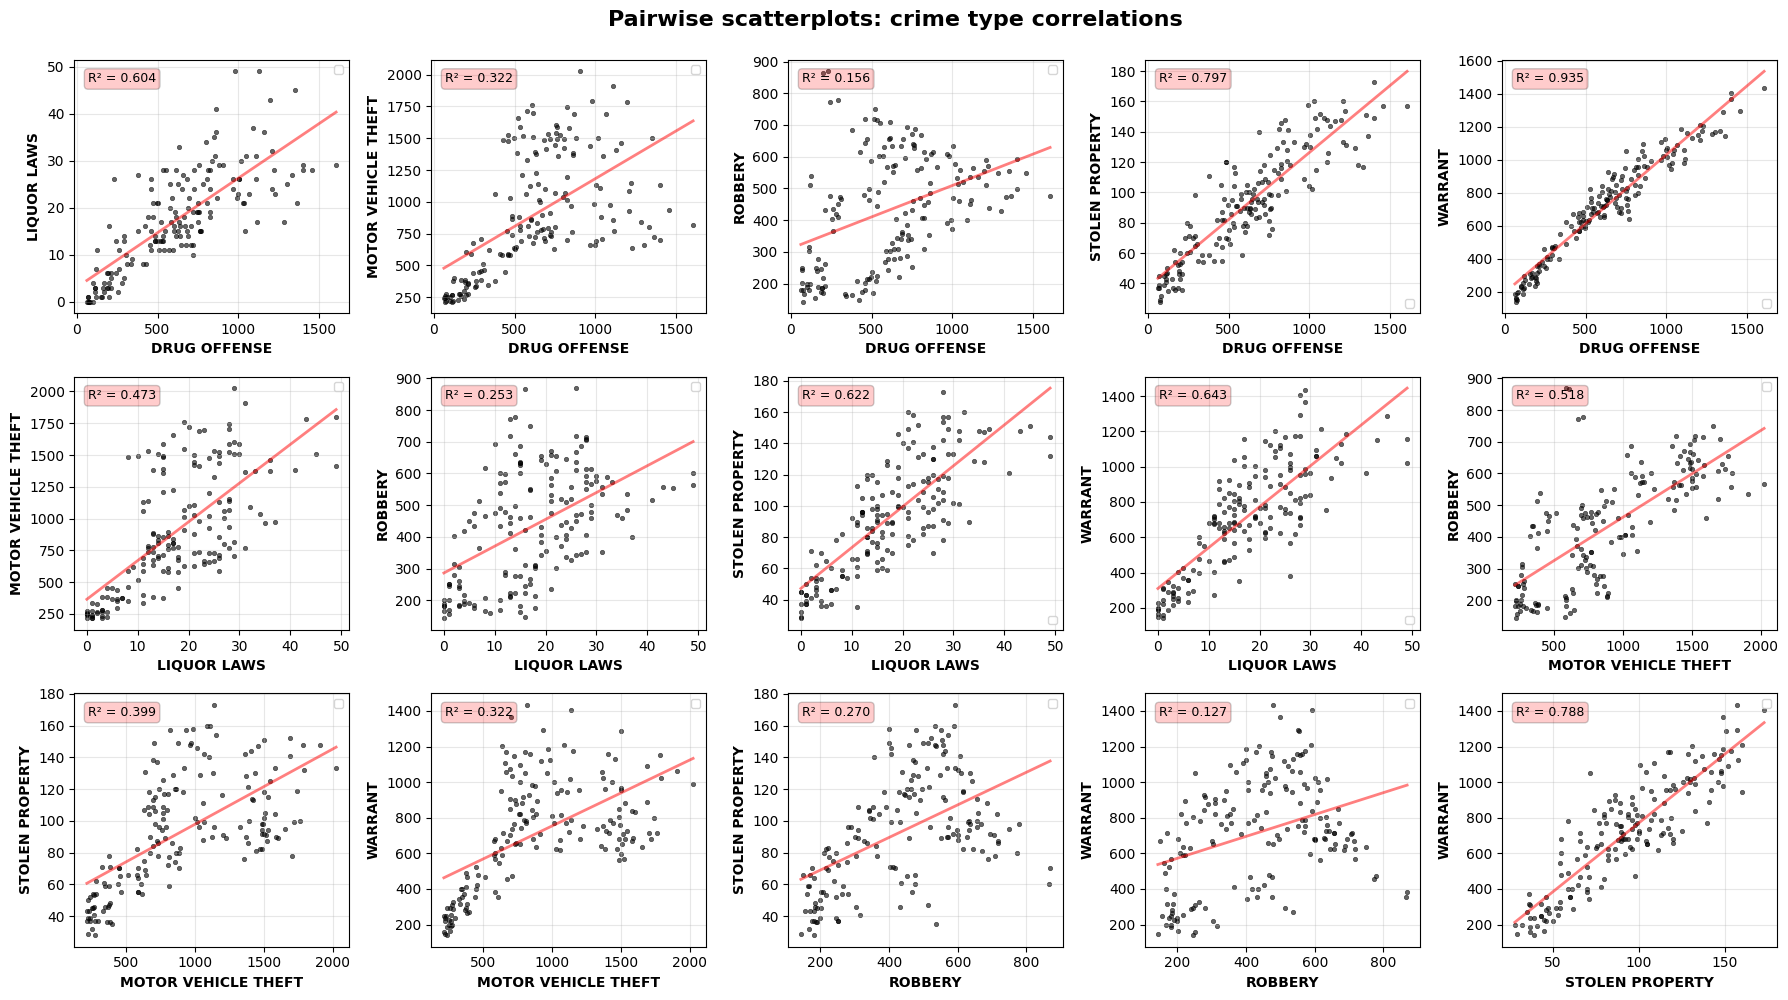

In [335]:
import matplotlib.pyplot as plt
import numpy as np
from itertools import combinations

# Get all pairwise combinations of crime categories
crime_types = weekly_vectors.columns.tolist()
pairs = list(combinations(crime_types, 2))

# Create a grid of subplots
# For 15 pairs (6 crimes), we'll use 3 rows × 5 columns
n_pairs = len(pairs)
n_cols = 5
n_rows = int(np.ceil(n_pairs / n_cols))

fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, 10))
axes = axes.flatten()

# Create a scatterplot for each pair
for idx, (crime1, crime2) in enumerate(pairs):
    ax = axes[idx]
    
    # Get the data for these two crime types
    x = weekly_vectors[crime1].values
    y = weekly_vectors[crime2].values
    hours = weekly_vectors.index.values
    
    # Create scatterplot
    ax.scatter(x, y, s=10, alpha=0.6, edgecolors='black', linewidth=0.5, color='black')
    
    # Compute and plot regression line
    a, b = compute_regression_line(x, y)
    x_min, x_max = x.min(), x.max()
    x_line = np.array([x_min, x_max])
    y_line = a * x_line + b
    ax.plot(x_line, y_line, color='red', linewidth=2, alpha=0.5)
    
    # Compute and display R²
    r_squared = compute_r_squared(x, y)
    ax.text(0.05, 0.95, f'R² = {r_squared:.3f}', transform=ax.transAxes, 
            fontsize=9, verticalalignment='top', bbox=dict(boxstyle='round', facecolor='red', alpha=0.2))
    
    # Add labels and title
    ax.set_xlabel(crime1, fontsize=10, fontweight='bold')
    ax.set_ylabel(crime2, fontsize=10, fontweight='bold')
    
    # Add grid
    ax.grid(True, alpha=0.3)
    ax.legend(fontsize=8, loc='best')

# Remove extra subplots
for idx in range(n_pairs, len(axes)):
    axes[idx].remove()

plt.suptitle('Pairwise scatterplots: crime type correlations', 
             fontsize=16, fontweight='bold', y=0.995)
plt.tight_layout()
plt.show()

### *Looking at your results: which pair of crimes is most correlated? Which is least correlated? Does the answer match your intuition? Why might two crime types share a weekly rhythm — or not?*

Based on our results, the most correlated crimes are WARRANT and DRUG OFFENSE which reinforces the idea presented in the beginning of the course reagrding police surveillance being concetrated in certain neighbourhoods - in this case it could suggest that neighbourhoods which have a high drug activity are more likely to have a higher police presence, this leading to more warrants being issued.

A similar correlation is present between LIQUOR LAWS and WARRANT.

Another aspect we were expecting is that addictions are correlated, as seen in the plot for LIQUOR LAWS and DRUG OFFENSE.

The least correlated crimes are ROBBERY and WARRANT which could be explained by the intuition that the richer neighbourhoods which have less warrants issued overall are the ones being primarily attacked by robbers.